<center><font face='Georgia'> 

# Traitement d'images. 

    
<center><font size=5 color ='grey' > <i><b>Compte Rendu TP4<b></i> : Filtrage fréquentiel  </center></font>
                 
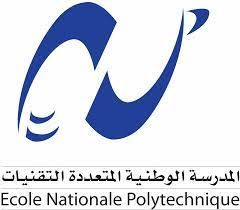


------



> **Fait par :**
<font color ='darkblue' face='Georgia' >    
 1.OUCHENE Souhil.  
 2.TOUATI Islem.
</font>
    
> **Janvier 2023**
    



## Importation des packages :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from PIL import Image


## Importation et affichage de l'image :

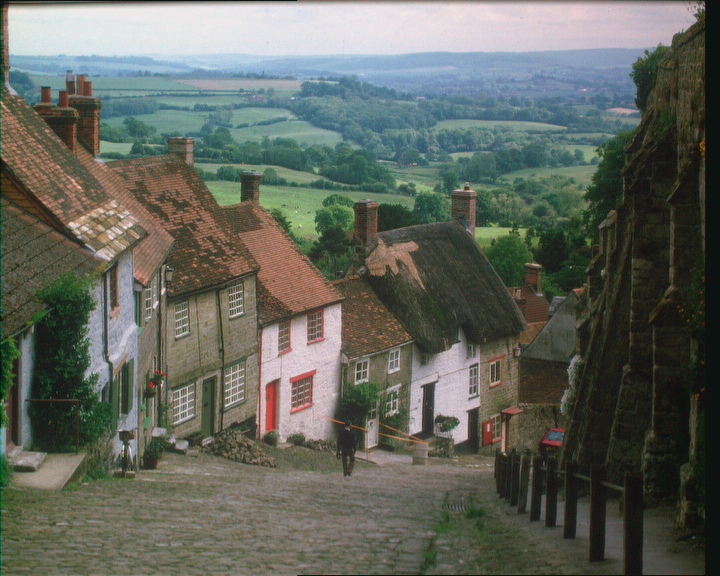

In [2]:
image = Image.open('goldhill.bmp')
image

## Converstion en niveau de gris:

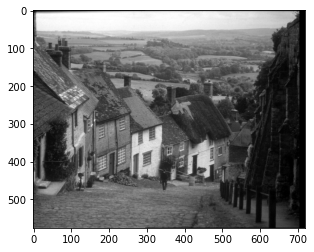

In [3]:
imageGray =image.convert('L')
plt.imshow(imageGray, cmap = "gray")
plt.show()

## Bruit Gaussien:

On va creer le bruit gaussien de moyenne 0 et ecart type 0.01. Pour se faire, on va d'abord avoir la matrice de l'image :

In [4]:
#Matrice de l'image en niveau de gris:
image_gray_array = np.array(imageGray)

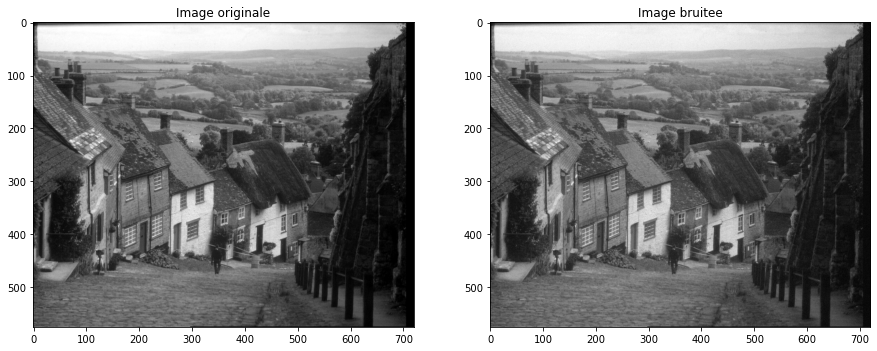

In [5]:
# génération de la matrice de bruit
matrice_shape = image_gray_array.shape
moyenne = 0 
ecart_type = 0.01
bruit = np.random.normal(moyenne, ecart_type, size = (matrice_shape[0] , matrice_shape[1]))
#Matrice bruitee :
image_bruit_matrice = image_gray_array + bruit*255
#Conversion matrice-image et affichage de matrice bruitee :
image_bruit = np.uint8(image_bruit_matrice)

fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,2,1)
plt.title("Image originale")
plt.imshow(image_gray_array, cmap = "gray")

fig.add_subplot(1,2,2)
plt.title("Image bruitee")
plt.imshow(image_bruit, cmap = "gray")
plt.show()

Comme l'ecart type et vraiment petit (0.01) la difference est difficile a voir, on va calculer la difference pour voir les choses un peu :

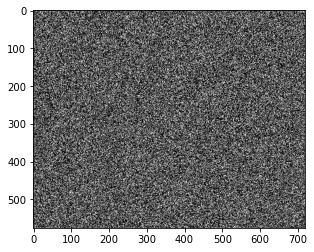

In [6]:
mat_diff = image_bruit_matrice - image_gray_array
img_mat_diff = np.uint8(mat_diff)
plt.imshow(img_mat_diff, cmap = "gray")
plt.show()

## Transformee de fourier discrete et affichage du spectre:

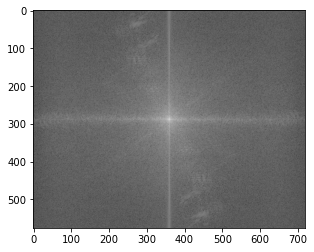

In [7]:
f = np.fft.fft2(image_bruit_matrice)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()


# Filtrage passe Bas :

### Creation du filtre :

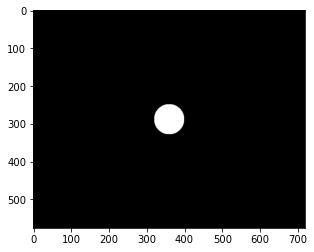

In [8]:
nl,nc=image_bruit_matrice.shape
D0=40 #D0 fréquence de coupure du filtre
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2,nc/2,1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H=z<D0
plt.imshow(H,cmap='gray')
plt.show()

### Application du filtre et affichage : 

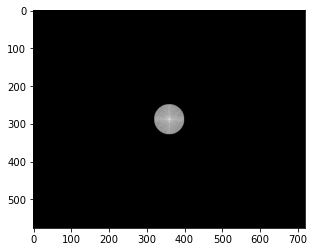

In [9]:
mult_1 = magnitude_spectrum * H
plt.imshow(mult_1,cmap='gray')
plt.show()

### Calcul de la transformee de Fourier inverse et affichage de l'image :

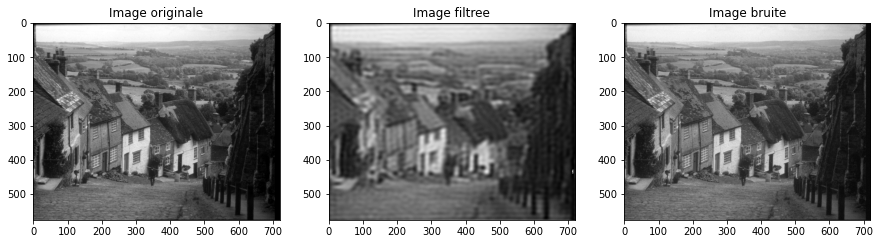

In [10]:
f_ishift = np.fft.ifftshift(fshift*H)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
img_back=np.uint8(img_back)
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1,3,1)
plt.title("Image originale")
plt.imshow(image_gray_array, cmap = "gray")

fig.add_subplot(1,3,2)
plt.title("Image filtree")
plt.imshow(img_back, cmap = "gray")

fig.add_subplot(1,3,3)
plt.title("Image bruite")
plt.imshow(image_bruit, cmap = "gray")
plt.show()

## Commentaires :
Comme on a vu au cours, les filtres passe-bas sont le bon outil pour l'elimination (attenuation) des hautes frequences (bruits et contours) en laissant passer seulement les basses frequences. Mais ils ont comme inconvenient (cas de filtre ideal): la creation des ondulations autour des contours (phenomene de Gibbs).
Dans ce qui suit on va agrandir l'image filtree pour que les ondulations soit claires :



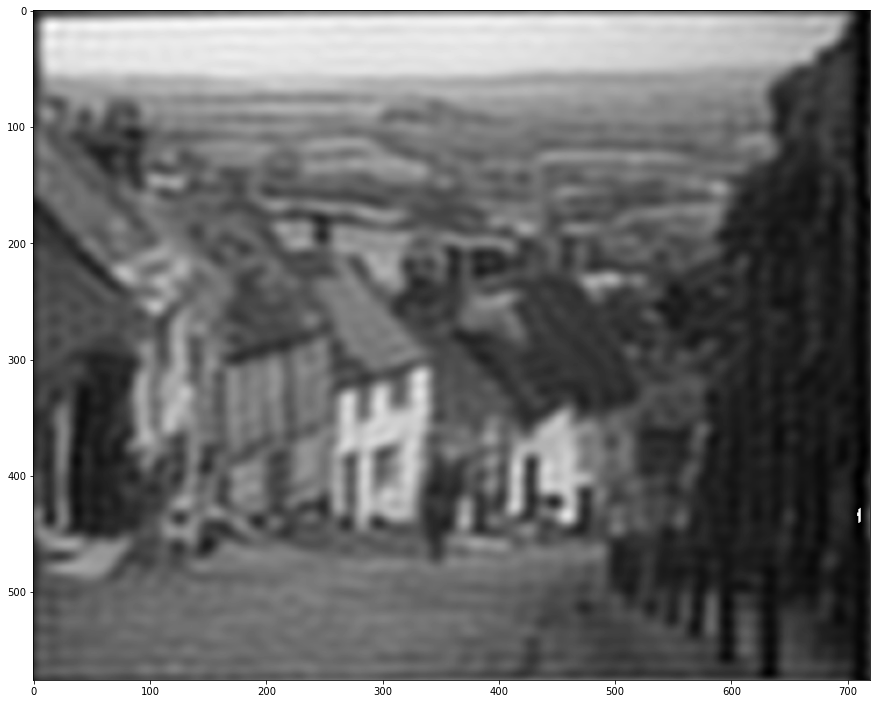

In [11]:
fig=plt.figure(figsize=(15, 15))
plt.imshow(img_back, cmap = "gray")
plt.show()

## Filtrage passe Haut:

### Creation du filtre :

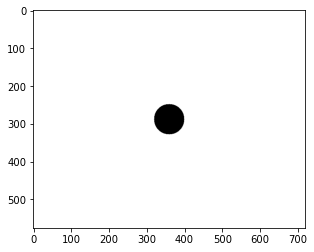

In [12]:
nl,nc=image_bruit_matrice.shape
D0=40 #D0 fréquence de coupure du filtre
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2,nc/2,1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H1=z>D0
plt.imshow(H1,cmap='gray')
plt.show()

### Application du filtre et affichage :

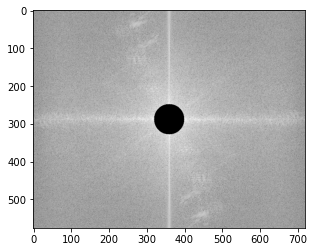

In [13]:
mult_2 = magnitude_spectrum * H1
plt.imshow(mult_2,cmap='gray')
plt.show()

### Calcul de la transformee de Fourier inverse et affichage de l'image :

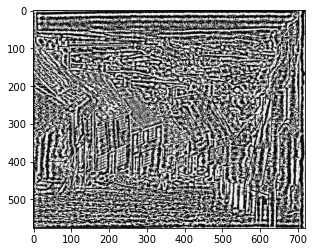

In [14]:
f_ishift1 = np.fft.ifftshift(fshift*H1)
img_back1 = np.fft.ifft2(f_ishift1)
img_back1 = np.real(img_back1)
img_back1 = np.uint8(img_back1)
plt.imshow(img_back1,cmap='gray')
plt.show()

## Commentaire:
Comme on le sait deja les filtre passe haut laisse passer les hautes frequences(details de l'images : contours --> contraste et du bruit) en eliminant les basses frequences. 

## Filtrage passe Bande:

### Creation du filtre :

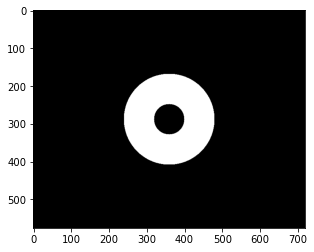

In [15]:
nl,nc = image_bruit_matrice.shape
D0 = 40 #D0 fréquence de coupure min du filtre
D1 = 120 #D1 fréquence de coupure max du filtre
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2,nc/2,1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H2 = z > D0 
H3 = z < D1
H23 = H2 & H3
plt.imshow(H23,cmap='gray')
plt.show()

### Application du filtre et affichage :

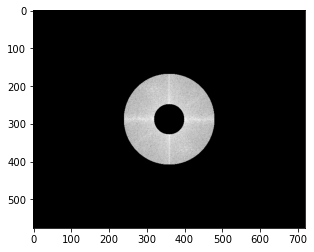

In [16]:
mult_3 = magnitude_spectrum * H23
plt.imshow(mult_3,cmap='gray')
plt.show()

### Calcul de la transformee de Fourier inverse et affichage de l'image :

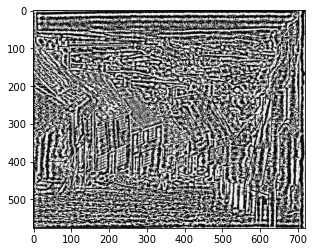

In [17]:
f_ishift23 = np.fft.ifftshift(fshift*H23)
img_back23 = np.fft.ifft2(f_ishift23)
img_back23 = np.real(img_back23)
img_back23 = np.uint8(img_back23)
plt.imshow(img_back1,cmap='gray')
plt.show()

## Commentaire:
Ce filtre met en evidence (accentuer) une plage de frequence (bande passante) qui est caracterisee par une texture.

## Conclusion

Dans le domaine frequentiel, on a 3 types de filtres(selon l'usage), dans notre cas on a utilise le filtre ideal :
- les filtres passe-bas : on essaye d'eliminer le maximum de bruit mais on perd des details de l'image (flou) + phenomene de Gibss. Il est preferable d'augmenter le D0 pour reconstituer le max de details.
- les filtres passe-bande : on essaye d'accentuer une plage de frequences selon une bande passant, elle donne comme resultat une texture. 
- les filtres passe-haut : on a une accentuation des contours + bruits.